# Expolratory analysis of Quran

In [1]:
#Bigger corpus
import gensim
from gensim.models import Word2Vec
 
def read_input(input_file):
    with open (input_file, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            yield gensim.utils.simple_preprocess(line)


file = read_input('quran-simple-clean.txt')

documents = [x for x in file]

documents[0:2]


C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[['بسم', 'الله', 'الرحمن', 'الرحيم'], ['الحمد', 'لله', 'رب', 'العالمين']]

In [9]:
#Separating chapters based on that four starting words of all chapters that are بسم الله الرحمن الرحيم
#Except for 1 chapter (baraa)
def get_chapters(docs):
    chapters = list()
    bismillah = ['بسم', 'الله', 'الرحمن', 'الرحيم']
    bismillah2 = ['بسم', 'اللـه', 'الرحمن', 'الرحيم']
    baraa=['براءة','من','الله','ورسوله']

    current_ch = []
    for i in range(len(docs)):
        first4 = docs[i][0:4]
        if (first4==bismillah) | (first4==bismillah2) | (first4==baraa) | (i==len(docs)-1):
            if current_ch != []: 
                current_ch = [word for words in current_ch for word in words]
                chapters.append(current_ch)
            current_ch=[]
        current_ch.append(docs[i])
    return(chapters)

In [10]:
chapters = get_chapters(documents)
print('Total chapters:', len(chapters))
print('First and last chapters:')
print(chapters[0])
print(chapters[len(chapters)-1])

Total chapters: 114
First and last chapters:
['بسم', 'الله', 'الرحمن', 'الرحيم', 'الحمد', 'لله', 'رب', 'العالمين', 'الرحمن', 'الرحيم', 'مالك', 'يوم', 'الدين', 'إياك', 'نعبد', 'وإياك', 'نستعين', 'اهدنا', 'الصراط', 'المستقيم', 'صراط', 'الذين', 'أنعمت', 'عليهم', 'غير', 'المغضوب', 'عليهم', 'ولا', 'الضالين']
['بسم', 'الله', 'الرحمن', 'الرحيم', 'قل', 'أعوذ', 'برب', 'الناس', 'ملك', 'الناس', 'إله', 'الناس', 'من', 'شر', 'الوسواس', 'الخناس', 'الذي', 'يوسوس', 'في', 'صدور', 'الناس']


In [17]:
chapter_names = ["Al-Fatiha", "Al-Baqara", "Al-Imran", "An-Nisa", "Al-Ma'ida", "Al-An'am", "Al-A'raf", 
                 "Al-Anfal", "At-Tawba", "Yunus", "Hud", "Yusuf", "Ar-Ra'd", "Ibrahim", "Al-Hijr", "An-Nahl", 
                 "Al-Isra", "Al-Kahf", "Maryam", "Ta-Ha", "Al-Anbiya", "Al-Hajj", "Al-Muminun", "An-Noor", 
                 "Al-Furqan", "Ash-Shu'ara", "An-Naml", "Al-Qisas", "Al-Ankabut", "Ar-Rum", "Luqman", "As-Sajda", 
                 "Al-Ahzab", "Saba", "Fatir", "Ya-Seen", "As-Saaffat", "ad", "Az-Zumar", "Ghafir", "Fussilat", 
                 "Ash-Shura", "Az-Zukhruf", "Ad-Dukhan", "Al-Jathiya", "Al-Ahqaf", "Muhammad", "Al-Fath", 
                 "Al-Hujraat", "Qaf", "Adh-Dhariyat", "At-Tur", "An-Najm", "Al-Qamar", "Ar-Rahman", "Al-Waqia", 
                 "Al-Hadid", "Al-Mujadila", "Al-Hashr", "Al-Mumtahina", "As-Saff", "Al-Jumua", "Al-Munafiqoon", 
                 "At-Taghabun", "At-Talaq", "At-Tahrim", "Al-Mulk", "Al-Qalam", "Al-Haaqqa", "Al-Maarij", "Nooh", 
                 "Al-Jinn", "Al-Muzzammil", "Al-Muddaththir", "Al-Qiyama", "Al-Insan", "Al-Mursalat", "An-Naba", 
                 "An-Naziat", "Abasa", "At-Takwir", "Al-Infitar", "Al-Mutaffifin", "Al-Inshiqaq", "Al-Burooj", 
                 "At-Tariq", "Al-Ala", "Al-Ghashiya", "Al-Fajr", "Al-Balad", "Ash-Shams", "Al-Lail", "Ad-Dhuha", 
                 "Al-Inshirah", "At-Tin", "Al-Alaq", "Al-Qadr", "Al-Bayyina", "Az-Zalzala", "Al-Adiyat", "Al-Qaria", 
                 "At-Takathur", "Al-Asr", "Al-Humaza", "Al-Fil", "Quraysh", "Al-Ma'un", "Al-Kawthar", "Al-Kafirun", 
                 "An-Nasr", "Al-Masadd", "Al-Ikhlas", "Al-Falaq", "Al-Nas"]

In [18]:
chapters_len = [len(chapter) for chapter in chapters]

In [19]:
import pandas as pd
df = pd.DataFrame({'length':chapters_len}, columns=['length'], index=chapter_names)
df.head()


,length
Al-Fatiha,29
Al-Baqara,6144
Al-Imran,3505
An-Nisa,3767
Al-Ma'ida,2841


## Length of chapters

Text(0, 0.5, 'Word count')

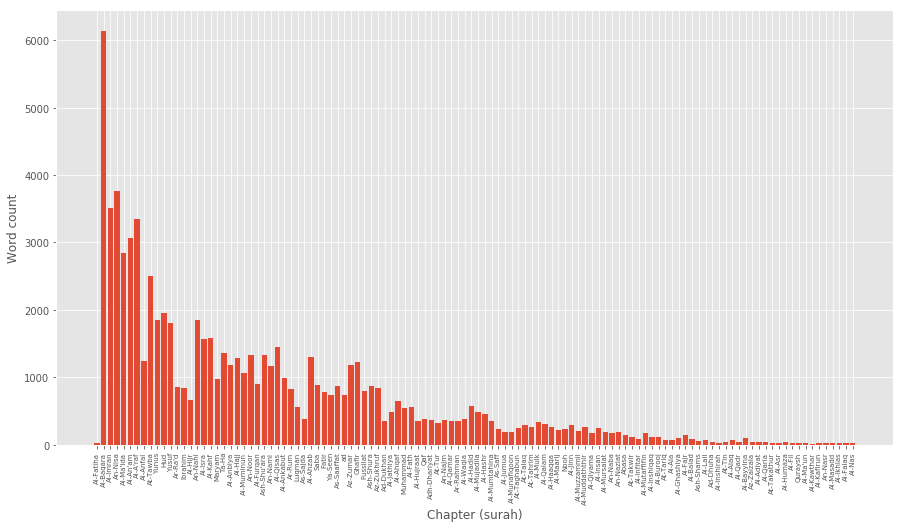

In [343]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

matplotlib.style.use('ggplot')
plt.figure(figsize=(15,8));
plt.bar(range(len(chapter_names)), chapters_len, align='center');
plt.xticks(range(len(chapter_names)), chapter_names, rotation='vertical');
plt.tick_params(axis='x', which='major', labelsize=7)
plt.xlabel("Chapter (surah)");
plt.ylabel("Word count");

In [348]:
df_sorted = df["length"].sort_values(ascending=False)
print(df_sorted)

Al-Baqara      6144
An-Nisa        3767
Al-Imran       3505
Al-A'raf       3345
Al-An'am       3060
Al-Ma'ida      2841
At-Tawba       2505
Hud            1950
An-Nahl        1848
Yunus          1843
Yusuf          1799
Al-Kahf        1587
Al-Isra        1562
Al-Qisas       1442
Ta-Ha          1357
Ash-Shu'ara    1324
An-Noor        1323
Al-Ahzab       1307
Al-Hajj        1283
Al-Anfal       1246
Ghafir         1230
Az-Zumar       1181
Al-Anbiya      1178
An-Naml        1163
Al-Muminun     1056
Al-Ankabut      982
Maryam          975
Al-Furqan       900
Saba            888
As-Saaffat      869
               ... 
Al-Bayyina       98
Al-Ghashiya      96
Al-Balad         86
Al-Infitar       85
Al-Alaq          76
Al-Ala           76
Al-Lail          75
At-Tariq         65
Ash-Shams        58
Al-Adiyat        44
Ad-Dhuha         44
Az-Zalzala       40
Al-Qaria         40
At-Tin           38
Al-Humaza        37
Al-Qadr          34
At-Takathur      32
Al-Inshirah      31
Al-Kafirun       31


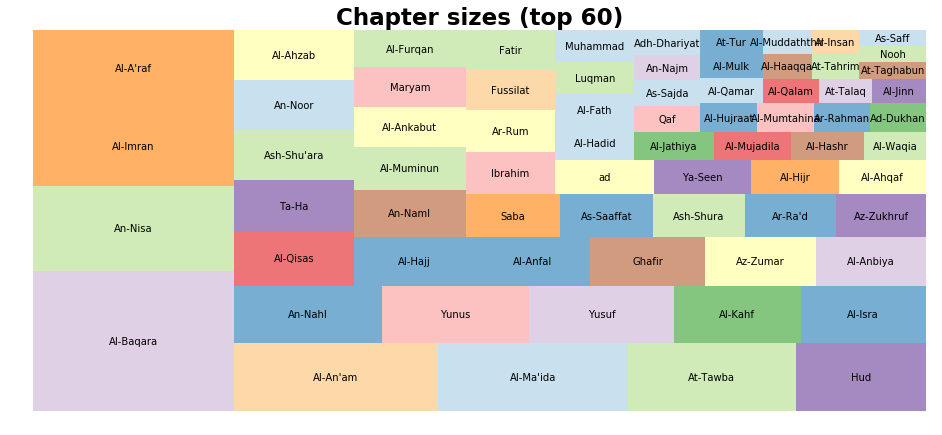

In [352]:
#!pip install squarify
import squarify

def plot_squarify(dfc, title, start, end, fontsize):
    plt.style.use('ggplot')
    df_sorted = dfc["length"].sort_values(ascending=False)[start:end]

    #Create our plot and resize it.
    fig = plt.gcf()
    ax = fig.add_subplot()
    fig.set_size_inches(16, 7)

    #Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
    squarify.plot(sizes=df_sorted.values, label=df_sorted.index.values, #color = colors, 
                  alpha=.6 , text_kwargs={'fontsize':fontsize})
    plt.title(title,fontsize=23,fontweight="bold")

    #Remove our axes and display the plot
    plt.axis('off')
    plt.show()

plt.rcParams['image.cmap'] = 'Paired'
plot_squarify(df, "Chapter sizes (top 60)", 0,70,10)

## Word frequency

In [20]:
## use pytag package
from collections import Counter
from nltk.util import ngrams
from pytagcloud import create_tag_image,  make_tags, LAYOUT_MIX
from IPython.display import Image
import operator

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [21]:
#Create a list of words that start with the letter و and separate this letter from the word
#the letter و means "and" and it was concatenated with words in the corpus

def create_AND_list(words):
## separate و of the words (add exception for words biginning by و)
    Listw = [i for i in words if i.startswith("و") ]
    Listw = list(set(Listw))

    #Exceptions
    exceptions = ['وكيل', 'وضع', 'وقفوا', 'واحدا', 'وقع', 'وسق', 'وقب', 'واسعة', 'وجد', 'وطرا'
                  , 'ودعك', 'وهاجا','وعدا', 'واديا','وعد', 'وردا', 'وزر']
    for ex in exceptions:
        Listw.remove(ex)
    return(Listw)

#create list of customized stop words from file
def create_stopwords_list():
    stopwords = open('stopwords_ar.txt', encoding='utf-8').read()
    stopwords = list(stopwords.split()) 
    stopwords.remove('\ufeff')
    return([' '+w+' ' for w in stopwords])

In [22]:
#Remove custom stop words
def remove_stop_words(words):
    raw_text = ' '.join(words)

    replacements = [(' '+w, ' '+w[0]+' '+w[1:]) for w in Listw]
    for r in replacements:
        raw_text = raw_text.replace(r[0],r[1])

    for r in stopwords:
        raw_text = raw_text.replace(r,' ')
    raw_text = raw_text.replace('الله','اللـه')

    return(raw_text.split())

In [23]:
#unflatten corpus
text_list = [w for chapter in chapters for w in chapter]
print('Number of total words:', len(text_list))
#create list of words starting with و
Listw = create_AND_list(text_list)
#create list of customized stop words from file
stopwords = create_stopwords_list()
#remove stop words
text_list = remove_stop_words(text_list)

Number of total words: 78239


In [444]:
unigrams = ngrams(text_list, 1) # resulting object is an iterator
unigrams = list(ngrams(text_list, 1)) # transforming iterator to list
# bigrams = ngrams(text_list, 2)
freq = Counter(unigrams)

In [445]:
topN = freq.most_common()[1:50] #top frequent 20 words
wordscount = {w[0]:f for w, f in topN}
sorted_wordscount = sorted(wordscount.items(), key=operator.itemgetter(1),reverse=True)
# print(sorted_wordscount) #

In [446]:
topwords = [w for w,v in sorted_wordscount]
topwords = [get_display(arabic_reshaper.reshape(w)) for w in topwords]
countwords = [v for w,v in sorted_wordscount]

Text(0, 0.5, 'Count')

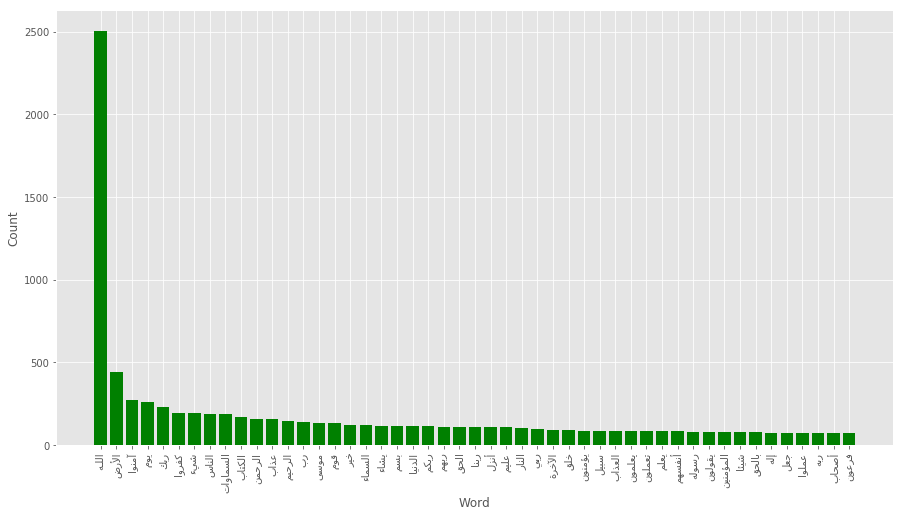

In [447]:
# !pip install python-bidi
#!pip install arabic_reshaper
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

matplotlib.style.use('ggplot')
plt.figure(figsize=(15,8));
plt.bar(range(len(topwords)), countwords, align='center', color='green');
plt.xticks(range(len(topwords)), topwords, rotation='vertical');
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xlabel("Word")
plt.ylabel("Count")

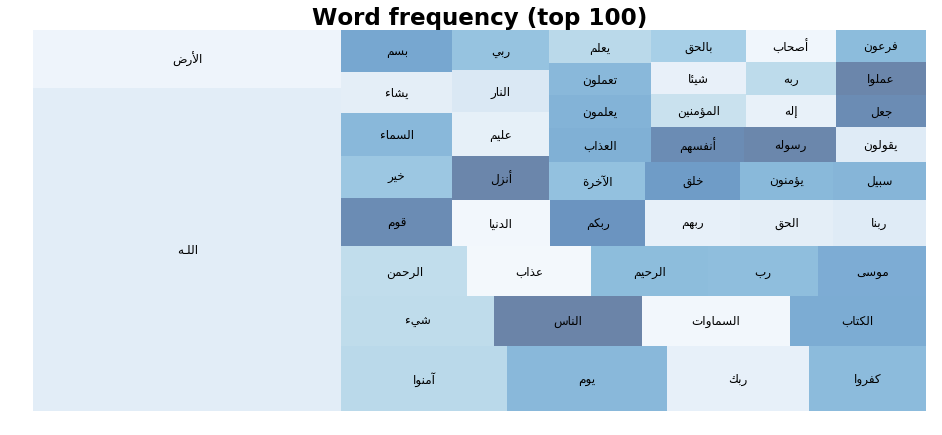

In [433]:
df2 = pd.DataFrame({'length':countwords}, columns=['length'], index=topwords)

plt.rcParams['image.cmap'] = 'Blues'
plot_squarify(df2, "Word frequency (top 100)", 0,70, 12)

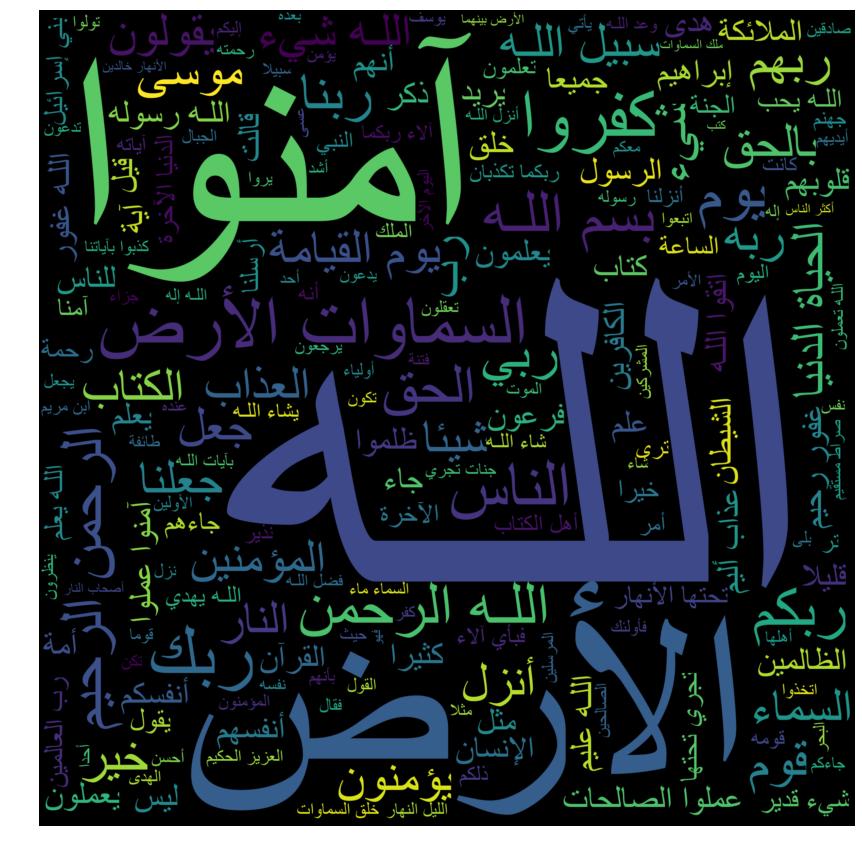

In [434]:
## using wordcloud package
from wordcloud import WordCloud 
text = get_display(arabic_reshaper.reshape(raw_text))

wordcloud = WordCloud(font_path='arial.ttf',  scale=6,  width=400, height=400,
                      background_color="black", max_words=200,).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Applying Word2Vec to the Quran

In [11]:
#stemm words (remove waw, hamza, diacritics, ...)
#https://www.nltk.org/api/nltk.stem.html
from nltk.stem import arlstem
st = arlstem.ARLSTem()
newchapters = []
for chapter in chapters:
    newchapter = []
    for word in chapter:
        word = st.norm(word) 
        word2 = st.pref(word)
        if word2 is not None:
            word = word2
        newchapter.append(word)
    newchapters.append(newchapter)
newdocuments = newchapters

In [24]:
#stemm words (remove waw, hamza, diacritics, ...)
#https://www.nltk.org/api/nltk.stem.html
from nltk.stem import arlstem
st = arlstem.ARLSTem()

def arabic_stemmer(doc):
    newdoc = []
    for word in doc:
        word = st.norm(word) 
        word2 = st.pref(word)
        if word2 is not None:
            word = word2
        newdoc.append(word)
    return(newdoc)
        
newdocuments = [arabic_stemmer(remove_stop_words(verse)) for verse in documents]

In [25]:
# build vocabulary and train model with word2vec
w2v_model = gensim.models.Word2Vec(newdocuments, size=200, window=5, min_count=5, workers=4) #min_count=10
w2v_model.train(newdocuments, total_examples=len(newdocuments), epochs=500) 

(16400423, 26670000)

In [26]:
sim_words = w2v_model.wv.most_similar('خير', topn=12)
for w in sim_words:
    print('%s: %.3f' % (w[0], w[1]))

متاع: 0.276
حياة: 0.231
اليم: 0.230
حسنا: 0.221
يخلف: 0.214
حرم: 0.199
اتخذتم: 0.196
اقرب: 0.196
تبين: 0.195
قربي: 0.195
كمن: 0.191
اوفوا: 0.191


C:\Users\Dell\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [27]:
positive1 = 'موسي'
negative1 = 'هارون'

positive2 = 'اسماعيل'

print(w2v_model.wv.most_similar([positive1, positive2], [negative1], topn=1))

[('اسحاق', 0.43606168031692505)]


We opted to only use the most popular words so that it’s easier to make a visualization later. Let’s see how does the new model perform (words and values will differ a bit):

### Visualizing Word2Vec Vectors with t-SNE
t-SNE (t-distributed stochastic neighbour embedding) is a popular algorithm in the deep learning crowd for displaying high-dimensional data in 2D/3D. Let’s see how we can use it to display our vectors.

In [30]:
#plot all words

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()
 
X = []
for word in w2v_model.wv.vocab:
    X.append(w2v_model.wv[word])
 
X = np.array(X)
print("Computed X: ", X.shape)
X_embedded = TSNE(n_components=2, n_iter=400, verbose=2).fit_transform(X)
print("Computed t-SNE", X_embedded.shape)

df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = X_embedded[:,0], X_embedded[:,1], w2v_model.wv.vocab
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

Loading BokehJS ...

Computed X:  (1944, 200)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1944 samples in 0.072s...
[t-SNE] Computed neighbors for 1944 samples in 2.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1944
[t-SNE] Computed conditional probabilities for sample 1944 / 1944
[t-SNE] Mean sigma: 3.600766
[t-SNE] Computed conditional probabilities in 0.130s
[t-SNE] Iteration 50: error = 109.8092728, gradient norm = 0.2495435 (50 iterations in 1.903s)
[t-SNE] Iteration 100: error = 117.6936111, gradient norm = 0.2082413 (50 iterations in 1.688s)
[t-SNE] Iteration 150: error = 120.5981674, gradient norm = 0.1950687 (50 iterations in 1.757s)
[t-SNE] Iteration 200: error = 121.2775879, gradient norm = 0.2451714 (50 iterations in 1.816s)
[t-SNE] Iteration 250: error = 120.3534012, gradient norm = 0.1772945 (50 iterations in 2.267s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 120.353401
[t-SNE] Iteration 300: error = 4.2245035, gradient norm = 0.00

## Plotting words

In [469]:
# X_embedded = X_embedded_pca

In [44]:
def plot_close_word(target, topn=20):
    words = w2v_model.wv.most_similar(target, topn=topn)
    words = [word for word,i in words]
    words = ' '.join(words)
    print(target)
    print(words)
    plot_words(words, target)
    
plot_close_word("فرعون")

فرعون
ساحر ملا لقومه جواب صاعقة هارون فاستكبروا ال عصوا فكذبوه قوة القي يدك اسرائيل مالا فاخذهم نجني كذبوا هامان بيضاء


C:\Users\Dell\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Loading BokehJS ...

Word that does not match: القي


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).


## Calculating distance

In [13]:
from scipy import spatial
def distance_words(word1,word2):    #between -1 and 1
    return(1-spatial.distance.cosine(w2v_model.wv[word1], w2v_model.wv[word2]))

print(distance_words('شيطان','رجيم'))
print(distance_words('الله','رحيم'))
print(distance_words('اسماعيل','ابراهيم'))

0.19121524691581726
0.03736066073179245
0.39061686396598816


In [14]:
def print_close_word(target, topn=10):
    words = w2v_model.wv.most_similar(target, topn=topn)
    for (word,distance) in words:
        print(word,np.round(distance_words(target,word),4),np.round(distance,4))

print_close_word("يوسف",3) 

ذهبنا 0.525 0.525
نستبق 0.513 0.513
اذهبوا 0.4946 0.4946


In [15]:
def get_distance_words(words, target):
    words = words.split()
    distances=[]
    for word in words:
        distance = distance_words(target,word)
        distances.append((word,distance))
    distances = sorted(distances, key=lambda tup: tup[1], reverse=True)
    return(distances)
        
dd = get_distance_words("اسماعيل شيطان اسحاق يوسف ادم ربنا زوجك لوط عجل بني حور بيت عين محمد مقام", "ادم")


In [16]:
#plot words similar to a given word
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
import pandas as pd

def plot_distance_words_1D(words, highlight_word):
    words = words + " " + highlight_word
    
    distances = get_distance_words(words, highlight_word)
    words = [word for word,i in distances]
    ds = [item[1] for item in distances]
    
    output_notebook()
    df = pd.DataFrame(columns=['x', 'y', 'word'])
    
#     x_values = range(len(distances))
#     y_values = ds
    
    ds = [1-d for d in ds]
    angles = [i* 2 * np.math.pi / len(distances) for i in range(len(distances))]
    x_values = [d * np.math.cos(angle) for d,angle in zip(ds,angles)]
    y_values = [d * np.math.sin(angle) for d,angle in zip(ds,angles)]
    x_values[0] = 0
    
    df['x'], df['y'], df['word'] = x_values, y_values, words

    source = ColumnDataSource(ColumnDataSource.from_df(df))
    labels = LabelSet(x="x", y="y", text="word",
                      text_font_size="10pt", text_color="#555555",
                      x_offset=13, y_offset=-6,
                      source=source, text_align='left')

    plot = figure(plot_width=900, plot_height=600)
    alphas = [1-d if d<1 else 0 for d in ds]

    for (index, row), alpha in zip(df.iterrows(),alphas):
        plot.line([0, row['x']], [0, row['y']], line_width=1, line_color="green", alpha=alpha)
        
    plot.circle("x", "y", size=10, source=source, line_color="black", fill_alpha=0.9)
    plot.add_layout(labels)

    source1 = ColumnDataSource(ColumnDataSource.from_df(df[df['word']==highlight_word]))
    plot.circle("x", "y", size=20, source=source1, fill_color='red', line_color="red", fill_alpha=1)    
    
    show(plot, notebook_handle=True)
    print('Word that does not match:',w2v_model.doesnt_match(words))
  
plot_distance_words_1D("اسماعيل شيطان اسحاق يوسف ملائكة ادم ربنا زوجك لوط هارون سليمان عجل بني بيت موسي اخرة جحيم جهنم محمد مقام", "رجيم")

Loading BokehJS ...

Word that does not match: اخرة


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).


In [ ]:
def plot_close_word_1D(target, topn=10):
    words = w2v_model.wv.most_similar(target, topn=topn)
    words = [word for word,i in words]
    words = ' '.join(words)
    print(target)
    print(words)
    plot_distance_words_1D(words, target)
    
plot_close_word_1D("عذاب", 20)